# LOAD AND EXPLORE

In [43]:
import pandas as pd
import geopandas as gpd

<AxesSubplot:>

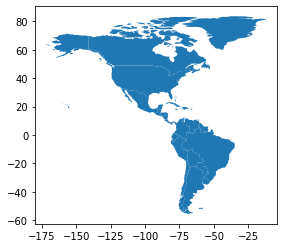

In [73]:
m = gpd.read_file('maps/americas_ori.json')
m.plot()

In [64]:
m.head()

scalerank       featurecla  labelrank   sovereignt sov_a3  adm0_dif  level  \
0          1  Admin-0 country          4  The Bahamas    BHS         0      2   
1          1  Admin-0 country          6       Belize    BLZ         0      2   
2          1  Admin-0 country          2       Canada    CAN         0      2   
3          1  Admin-0 country          3      Denmark    DN1         1      2   
4          1  Admin-0 country          5   Costa Rica    CRI         0      2   

                type        admin adm0_a3  ...  region_un         subregion  \
0  Sovereign country  The Bahamas     BHS  ...   Americas         Caribbean   
1  Sovereign country       Belize     BLZ  ...   Americas   Central America   
2  Sovereign country       Canada     CAN  ...   Americas  Northern America   
3            Country    Greenland     GRL  ...   Americas  Northern America   
4  Sovereign country   Costa Rica     CRI  ...   Americas   Central America   

                   region_wb  name_len long_len abbrev_len  tiny homepart  \
0  Latin America & Caribbean         7        7          4   -99        1   
1  Latin America & Caribbean         6        6          6   -99        1   
2              North America         6        6          4   -99        1   
3      Europe & Central Asia         9        9          6   -99      -99   
4  Latin America & Caribbean        10       10          4   -99        1   

      filename                                           geometry  
0  BHS.geojson  MULTIPOLYGON (((-77.53466 23.75975, -77.78000 ...  
1  BLZ.geojson  POLYGON ((-89.14308 17.80832, -89.15091 17.955...  
2  CAN.geojson  MULTIPOLYGON (((-63.66450 46.55001, -62.93930 ...  
3  GRL.geojson  POLYGON ((-46.76379 82.62796, -43.40644 83.225...  
4  CRI.geojson  POLYGON ((-82.96578 8.22503, -83.50844 8.44693...  

[5 rows x 65 columns]

<ipython-input-74-ede339104120>:1: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  m['geometry'] = m['geometry'].buffer(0.0001)


<AxesSubplot:>

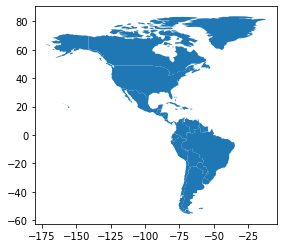

In [74]:
m['geometry'] = m['geometry'].buffer(0.0001)
m.plot()

In [75]:
subregions = m.continent
subregions.unique()

array(['North America', 'South America'], dtype=object)

In [78]:
color = {}
color['Caribbean'] = '#1b9e77'
color['Central America'] = '#d95f02'
color['Northern America'] = '#7570b3'
color['South America'] = '#e7298a'
m['color'] = m['subregion'].map(color)

In [79]:
m.plot(figsize = (20, 20), color=m['color'])

<AxesSubplot:>

<AxesSubplot:>

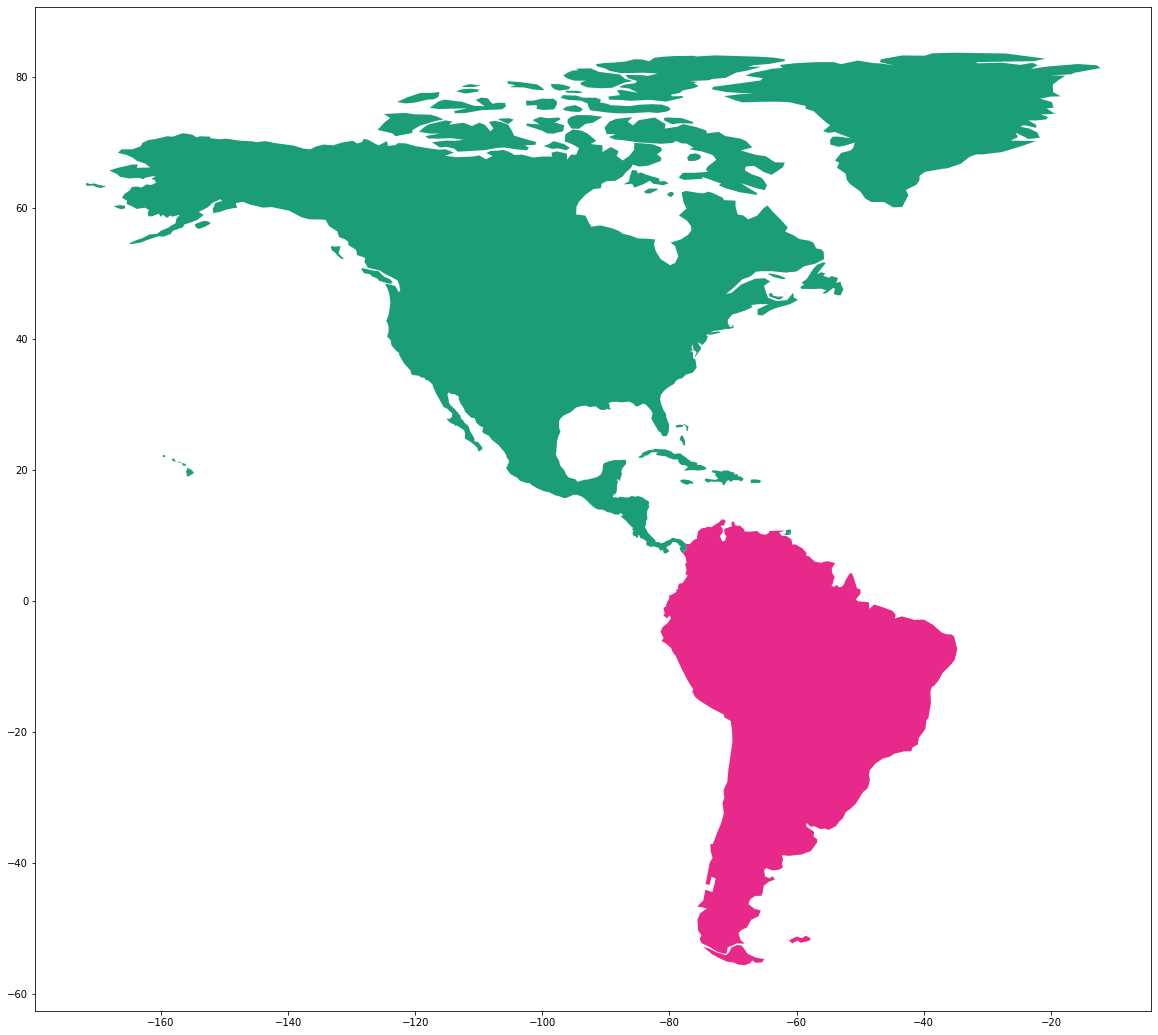

In [80]:
sub_r = m.dissolve(by='continent')
sub_r.plot(figsize = (20, 20), color=sub_r['color'])

In [81]:
sub_r.head()
sub_r['hierarchical_level'] = 'parent'
m['hierarchical_level'] = 'child'

In [82]:
m = m.append(sub_r, ignore_index=True)

In [83]:
m.to_file("./maps/americas.json", driver="GeoJSON")